# Intel Investment Strategy Analysis

In [24]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

# load data w/ competitors
companies = ["INTC", "AMD", "NVDA", "QCOM"]
df = pd.DataFrame()

for t in companies:
    df[t] = yf.download(t, period="5y")["Adj Close"]
print(df.head())

# separate Intel and its competitors
intel_df = df["INTC"]
competitors_df = df[["AMD", "NVDA", "QCOM"]]
print(intel_df.head())
print(competitors_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                 INTC        AMD      NVDA       QCOM
Date                                                 
2019-12-10  49.917580  39.439999  5.327168  75.293983
2019-12-11  50.340988  39.470001  5.410817  77.862862
2019-12-12  50.764374  42.590000  5.578363  79.706696
2019-12-13  50.976089  41.150002  5.576373  78.614716
2019-12-16  50.896702  42.349998  5.605251  79.151741
Date
2019-12-10    49.917580
2019-12-11    50.340988
2019-12-12    50.764374
2019-12-13    50.976089
2019-12-16    50.896702
Name: INTC, dtype: float64
                  AMD      NVDA       QCOM
Date                                      
2019-12-10  39.439999  5.327168  75.293983
2019-12-11  39.470001  5.410817  77.862862
2019-12-12  42.590000  5.578363  79.706696
2019-12-13  41.150002  5.576373  78.614716
2019-12-16  42.349998  5.605251  79.151741


## Financial Highlights and Projections

Simple returns:
                INTC       AMD      NVDA      QCOM
Date                                              
2019-12-10       NaN       NaN       NaN       NaN
2019-12-11  0.008482  0.000761  0.015702  0.034118
2019-12-12  0.008410  0.079047  0.030965  0.023681
2019-12-13  0.004171 -0.033811 -0.000357 -0.013700
2019-12-16 -0.001557  0.029162  0.005179  0.006831
...              ...       ...       ...       ...
2024-12-04 -0.022697  0.014157  0.034793  0.004675
2024-12-05 -0.052823 -0.018265 -0.000482 -0.012924
2024-12-06  0.005769 -0.019595 -0.018061 -0.005487
2024-12-09 -0.005258 -0.055704 -0.025484  0.007711
2024-12-10 -0.027328 -0.021399 -0.017938 -0.019006

[1259 rows x 4 columns]
           Revenue    Net Income   EPS   P/E Ratio    Market Cap  \
INTC  5.424700e+10 -1.596100e+10 -3.88         NaN  8.710103e+10   
AMD   2.429500e+10  1.826000e+09  0.47  113.289560  2.077476e+11   
NVDA  9.630700e+10  5.300800e+10  0.78   53.824112  3.334926e+12   
QCOM  3.896200e+10  1.01

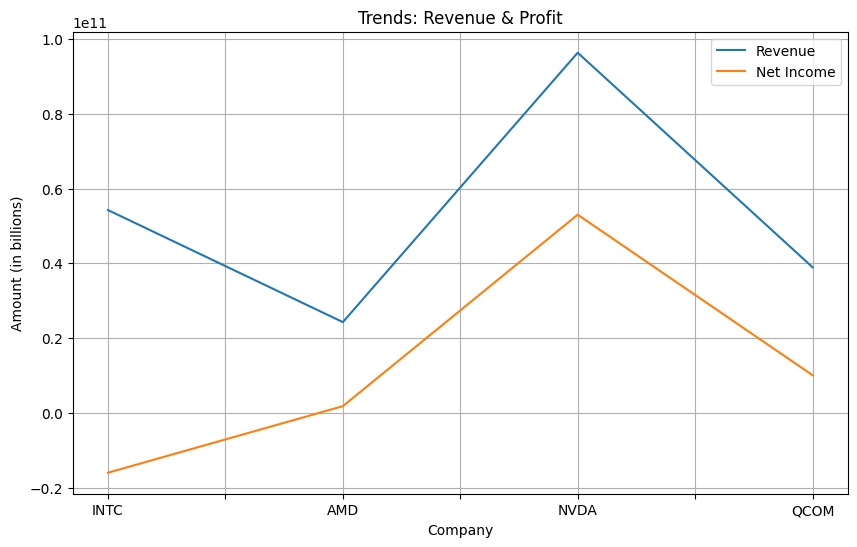

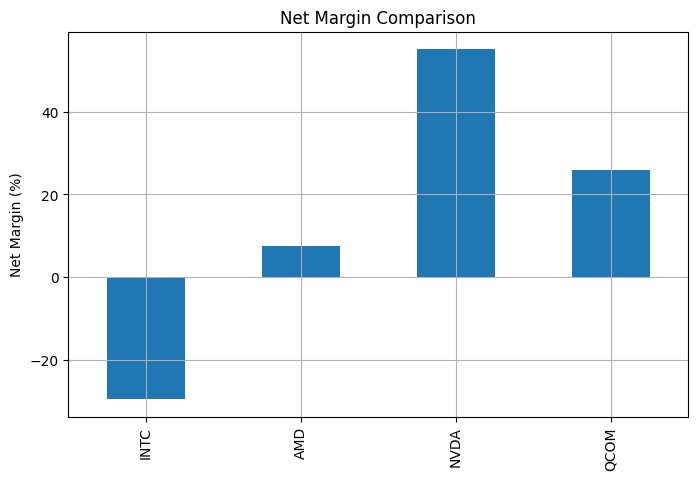

In [ ]:
# get simple returns of each company
simpleReturns = (df / df.shift(1)) - 1
print(f"Simple returns:\n{simpleReturns}")

# get financial metrics for all companies
financial_metrics = pd.DataFrame()

for company in companies:
    stock = yf.Ticker(company)
    info = stock.info
    financials = stock.financials
    
    # extract key metrics
    try:
        financial_metrics.loc[company, 'Revenue'] = info.get('totalRevenue', np.nan)
        financial_metrics.loc[company, 'Net Income'] = info.get('netIncomeToCommon', np.nan)
        financial_metrics.loc[company, 'EPS'] = info.get('trailingEPS', np.nan)
        financial_metrics.loc[company, 'P/E Ratio'] = info.get('trailingPE', np.nan)
        financial_metrics.loc[company, 'Market Cap'] = info.get('marketCap', np.nan)
        financial_metrics.loc[company, 'Operating Margin'] = info.get('operatingMargins', np.nan)
    except:
        continue

# manually get EPS of each company and update on financial_metrics DataFrame
financial_metrics['EPS'] = [-3.88, 0.47, 0.78, 2.57]

# calculate market share based on revenue
financial_metrics['Market Share'] = financial_metrics['Revenue'] / financial_metrics['Revenue'].sum()

# Calculate year-over-year growth for revenue, profit, and EPS
financial_metrics['Revenue Growth (%)'] = financial_metrics['Revenue'].pct_change() * 100
financial_metrics['Net Income Growth (%)'] = financial_metrics['Net Income'].pct_change() * 100
financial_metrics['EPS Growth (%)'] = financial_metrics['EPS'].pct_change() * 100

# calculate Net Margin
financial_metrics['Net Margin (%)'] = (financial_metrics['Net Income'] / financial_metrics['Revenue']) * 100

print(financial_metrics)

financial_metrics[['Revenue', 'Net Income']].plot(kind='line', figsize=(10, 6), title='Trends: Revenue & Profit')
plt.xlabel('Company')
plt.ylabel('Amount (in billions)')
plt.grid()
plt.show()

## Market and Competitive Analysis

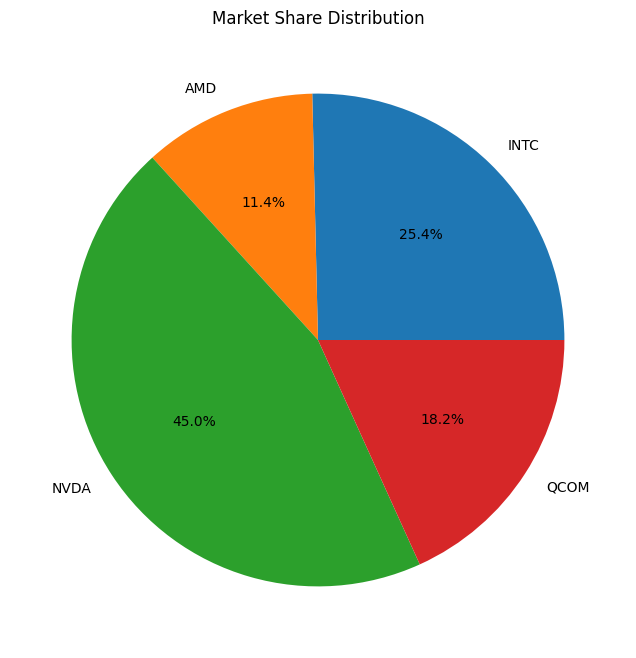

In [ ]:
# net margins comparisons
financial_metrics['Net Margin (%)'].plot(kind='bar', figsize=(8, 5), title='Net Margin Comparison')
plt.ylabel('Net Margin (%)')
plt.grid()
plt.show()

# visualize Market Share
financial_metrics['Market Share'].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Market Share Distribution')
plt.ylabel('')
plt.show()

## Valuation Metrics

           Revenue    Net Income   EPS   P/E Ratio    Market Cap  \
INTC  5.424700e+10 -1.596100e+10 -3.88         NaN  8.751034e+10   
AMD   2.429500e+10  1.826000e+09  0.47  113.535080  2.100403e+11   
NVDA  9.630700e+10  5.300800e+10  0.78   54.465160  3.387984e+12   
QCOM  3.896200e+10  1.011000e+10  2.57   17.788355  1.764824e+11   

      Operating Margin  Market Share  Revenue Growth (%)  \
INTC          -0.01046      0.253715                 NaN   
AMD            0.10617      0.113628          -55.214111   
NVDA           0.62057      0.450431          296.406681   
QCOM           0.26250      0.182226          -59.543960   

      Net Income Growth (%)  Net Margin (%)  Price Target (P/E)  
INTC                    NaN      -29.422826                 NaN  
AMD             -111.440386        7.515950           53.361488  
NVDA            2802.957228       55.040648           42.482825  
QCOM             -80.927407       25.948360           45.716072  
Expected Portfolio Return: 0

Text(0, 0.5, 'Expected Return')

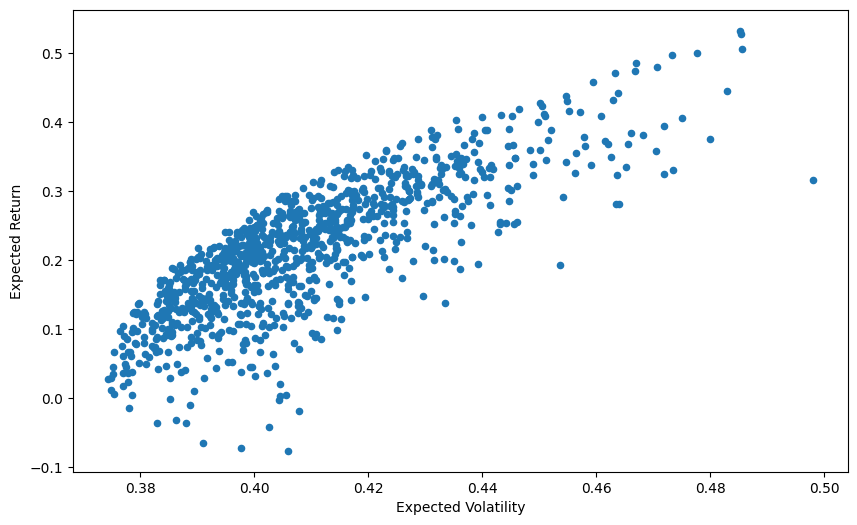

In [ ]:
# compare company valuations
financial_metrics['Price Target (P/E)'] = financial_metrics['EPS'] * financial_metrics['P/E Ratio']
print(financial_metrics)

# Markowitz Efficient Frontier
logReturns = np.log(df / df.shift(1))
numAssets = len(companies)

weights = np.random.random(numAssets)
weights /= np.sum(weights)

expectedPortReturn = np.sum(weights * logReturns.mean()) * 250
expectedPortVar = np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))
expectedPortVol = np.sqrt(np.dot(weights.T,np.dot(logReturns.cov() * 250, weights)))
print(f"Expected Portfolio Return: {expectedPortReturn}")
print(f"Expected Portfolio Variance: {expectedPortVar}")
print(f"Expected Portfolio Volatility: {expectedPortVol}")

portfolioReturns = []
portfolioVolatilities = []

for x in range (1000):
    weights = np.random.random(numAssets)
    weights /= np.sum(weights)
    portfolioReturns.append(np.sum(weights * logReturns.mean()) * 250)
    portfolioVolatilities.append(np.sqrt(np.dot(weights.T,np.dot(logReturns.cov() * 250, weights))))
    
portfolioReturns = np.array(portfolioReturns)
portfolioVolatilities = np.array(portfolioVolatilities)

portfolios = pd.DataFrame({'Return': portfolioReturns, 'Volatility': portfolioVolatilities})

portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')